# **Assignment #1 - Reproducibility**
#### **Mining Large Scale Datasets 2024/2025**
#### Maria Rafaela Abrunhosa 107558

## Context and Motivation
This project aims to reproduce an application of a data mining process, published in a scientific venue [1]. We focus on replicating the predictive modelling as part of the data mining process.\
THe published paper used as a guide to this data mining process reproduction, presents two malware feature datasets on two different platforms to support validation of the effectiveness of a malware detection method.

The article consists of three contributions, starting with the development of two structures for creating datasets for malware for Windows and Android, by extracting features from malware analysis reports to create two datasets of malware features and, an evaluation of the usefulness of the datasets. However, in this work we will only attempt to reproduce the third point of evaluating the usefulness of the datasets in a supervised framework, as we have no way of replicating steps 1 and 2 of the article.

### What is reproducibility?
Reproducibility is the ability of a researcher to replicate the results of a previous study using the same materials that the original researcher used to try to get the same results as the previous study [2].

## Dataset and Pre-processing
First of all, it's important to note that the previous study has two datasets of malware characteristics, one for Windows malware and the other for Android malware, TUMALWD and TUANDROMD respectively. However, for the purposes of this reproduction, we'll only use the TUANDROMD dataset, as it was the only one provided and we couldn't find the other or anything identical.

#### Imports

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [46]:
# read the csv file - dataset TUANDROMD
data = pd.read_csv('TUANDROMD.csv')

data.head()

,ACCESS_ALL_DOWNLOADS,ACCESS_CACHE_FILESYSTEM,ACCESS_CHECKIN_PROPERTIES,ACCESS_COARSE_LOCATION,ACCESS_COARSE_UPDATES,ACCESS_FINE_LOCATION,ACCESS_LOCATION_EXTRA_COMMANDS,ACCESS_MOCK_LOCATION,ACCESS_MTK_MMHW,ACCESS_NETWORK_STATE,...,Landroid/telephony/TelephonyManager;->getLine1Number,Landroid/telephony/TelephonyManager;->getNetworkOperator,Landroid/telephony/TelephonyManager;->getNetworkOperatorName,Landroid/telephony/TelephonyManager;->getNetworkCountryIso,Landroid/telephony/TelephonyManager;->getSimOperator,Landroid/telephony/TelephonyManager;->getSimOperatorName,Landroid/telephony/TelephonyManager;->getSimCountryIso,Landroid/telephony/TelephonyManager;->getSimSerialNumber,Lorg/apache/http/impl/client/DefaultHttpClient;->execute,Label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,malware
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,malware
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,malware
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,malware


### Check the following points/characteristics

1) Characteristics of TUANDROMD written in the paper we are using as a guide:
    1) Labels in the data: The TUANDROMD dataset has 72 labels where 71 labels represents the whole malware family and the remaining one label belong to the normal class.

    2) Number of instances: There are a total 25,553 instances for both the permission and API-based features, of which 24,553 instances belong to the malware class and the rest 1000 instances belong to the benign class.

    3) Number of features: For permission-based features, all the permissions used by the applications are extracted as features. A total of 178 features are extracted. Similarly, for API based features, a total of 186 features are extracted.

    4) Balance between the classes: The dataset is not perfectly balanced i.e., the dataset does not have an equal number of instances for both classes. This slight imblance can be easily handled by collecting more instances or sampling techniques. The proposed dataset creation framework can handle such adaptaions.

    5) Recency: The data collected for creation of TUANDROMD are recent. As and when new malicious and normal android applications are available, the dataset can be updated accordingly.

    6) Relevance: The extracted features helps distinguish between malware and benign android applications. To the best of our knowledge, these features are relevant differentiating between the two.

Dataset shape:  (4465, 242)
Labels in the data:  Label
malware     3565
goodware     899
Name: count, dtype: int64
Number of instances:  4465
Number of features:  242


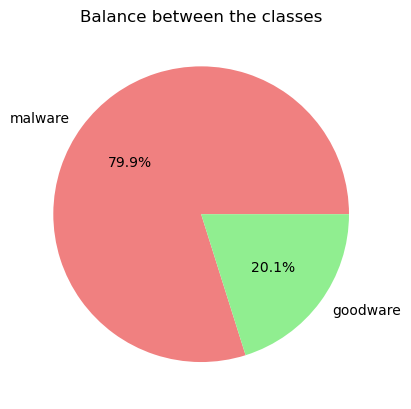

ACCESS_ALL_DOWNLOADS                                        1
ACCESS_CACHE_FILESYSTEM                                     1
ACCESS_CHECKIN_PROPERTIES                                   1
ACCESS_COARSE_LOCATION                                      1
ACCESS_COARSE_UPDATES                                       1
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    1
Landroid/telephony/TelephonyManager;->getSimCountryIso      1
Landroid/telephony/TelephonyManager;->getSimSerialNumber    1
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    1
Label                                                       1
Length: 242, dtype: int64


In [47]:
# tamanho do dataset
print("Dataset shape: ", data.shape) # (4465, 242)

# classes
labels = data['Label'].value_counts() # malware 3565 + goodware 899
print("Labels in the data: ", labels)

# numero de observações
print("Number of instances: ", len(data)) # 4465

# numero de variaveis
print("Number of features: ", len(data.columns)) # 242

# distruibuição dos dados pelas classes
data['Label'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['lightcoral', 'lightgreen'])
plt.ylabel('')
plt.title('Balance between the classes') # very unbalanced dataset
plt.show()

# check missing values
print(data.isnull().sum()) # one empty line

# **<font color="lightcoral">take conclusions about the previous points - are they same of the results in the paper?</font>**

### Check the top features for TUANDROMD

**TABLE I** - LIST OF TOP RANKED FEATURES FOR TUANDROMD written in the paper we are using as a guide

| Feature Rank | Feature Name |
| ------------ | ------------ |
| 1 | SEND_SMS |
| 2 | RECEIVE_BOOT_COMPLETED |
| 3 | GET_TASKS |
| 4 | *Ljava/net/URL;* − > *openConnection* |
| 5 | VIBRATE |
| 6 | WAKE_LOCK |
| 7 | KILL_BACKGROUND_PROCESSES |
| 8 | SYSTEM_ALERT_WINDOW |
| 9 | ACCESS_WIFI_STATE |
| 10 | DISABLE_KEY_GUARD |
| 11 | *Landroid/location/LocationManager;* − > *getLastKnownLocation* |
| 12 | READ_PHONE_STATE |
| 13 | RECEIVE_SMS |
| 14 | CHANGE_WIFI_STATE |
| 15 | WRITE_EXTERNAL_STORAGE |

In [ ]:
# train and test split
data2 = data.dropna()
# print(data2.isnull().sum()) # one empty line

X = data2.drop(columns=['Label'])
y = data2['Label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ACCESS_ALL_DOWNLOADS                                        0
ACCESS_CACHE_FILESYSTEM                                     0
ACCESS_CHECKIN_PROPERTIES                                   0
ACCESS_COARSE_LOCATION                                      0
ACCESS_COARSE_UPDATES                                       0
                                                           ..
Landroid/telephony/TelephonyManager;->getSimOperatorName    0
Landroid/telephony/TelephonyManager;->getSimCountryIso      0
Landroid/telephony/TelephonyManager;->getSimSerialNumber    0
Lorg/apache/http/impl/client/DefaultHttpClient;->execute    0
Label                                                       0
Length: 242, dtype: int64


                                               Feature  Importance
149                             RECEIVE_BOOT_COMPLETED    0.154621
220                     Ljava/net/URL;->openConnection    0.095576
228  Landroid/location/LocationManager;->getLastKgo...    0.072026
86                                           GET_TASKS    0.060979
191                                          WAKE_LOCK    0.058397
100                          KILL_BACKGROUND_PROCESSES    0.037840
217                           Ljava/lang/System;->load    0.032456
138                                   READ_PHONE_STATE    0.029641
219                    Ljava/lang/System;->loadLibrary    0.023947
218          Ldalvik/system/DexClassLoader;->loadClass    0.022712
152                                        RECEIVE_SMS    0.020154
216                          Ljava/lang/Runtime;->exec    0.018967
190                                            VIBRATE    0.018231
233  Landroid/telephony/TelephonyManager;->getNetwo...    0.01

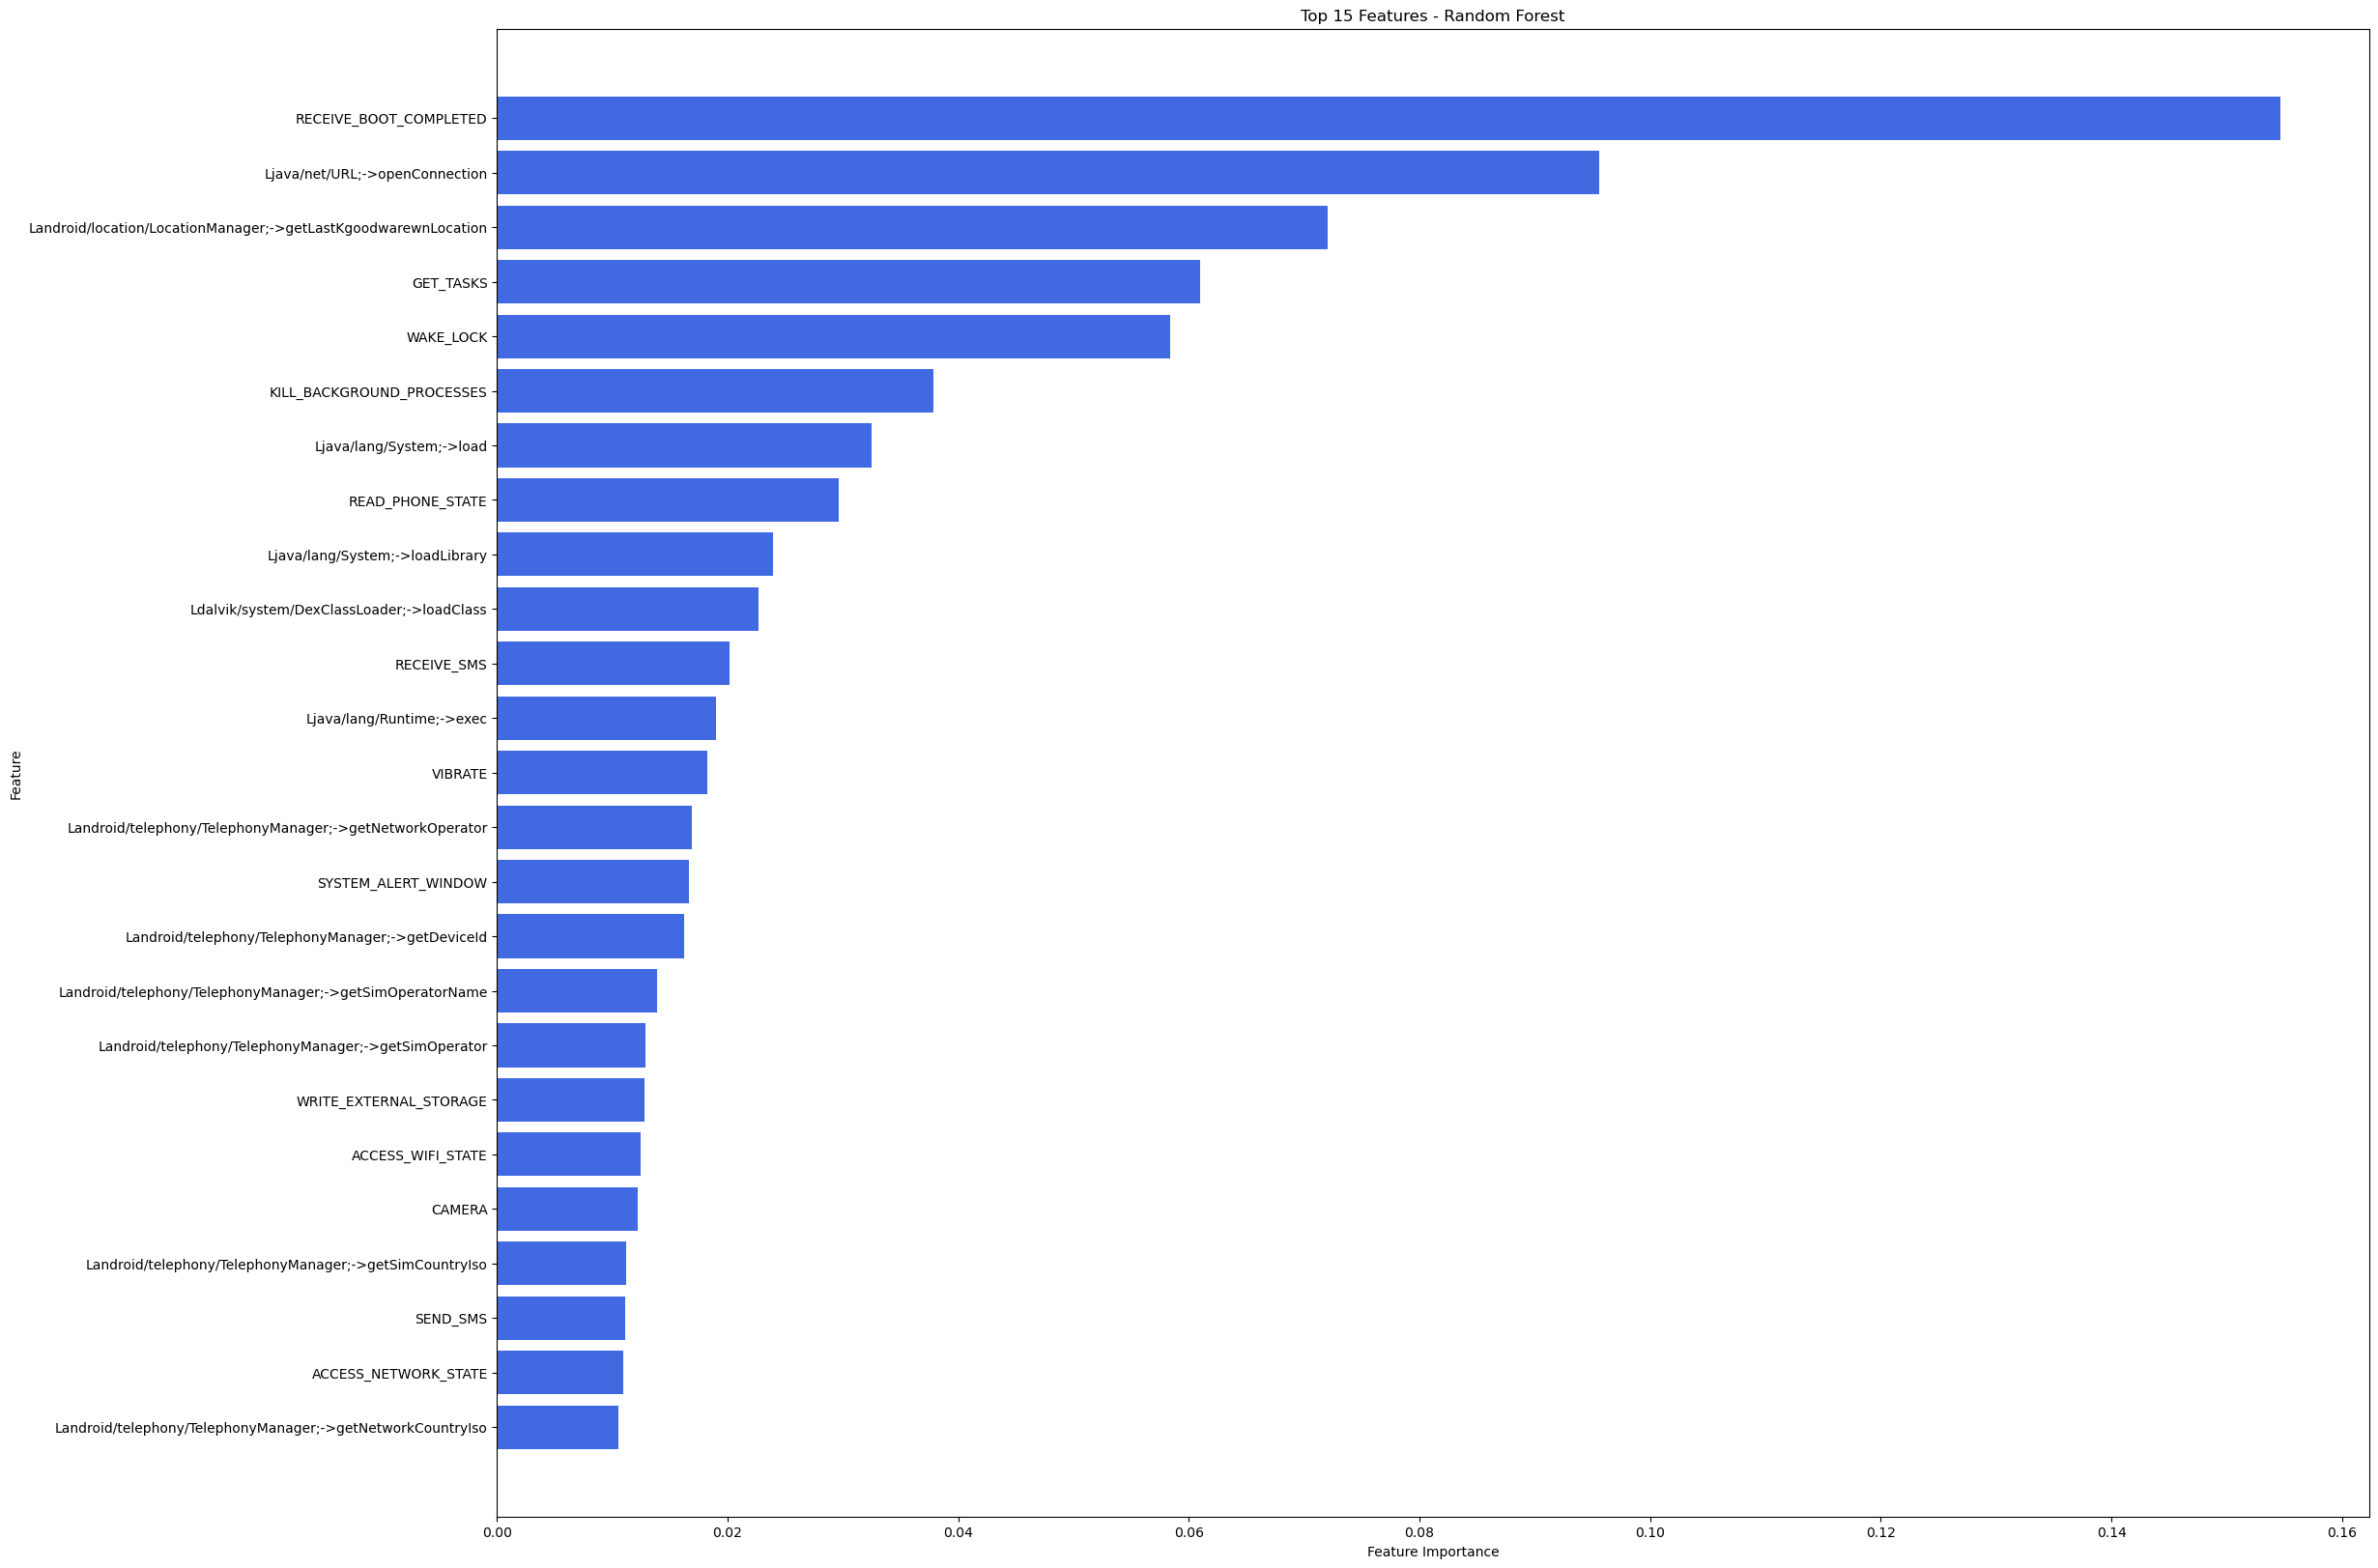

In [61]:
# list of top ranked features for tuandromd (15)

rf = RandomForestClassifier(n_estimators=100, random_state=42) # train random forest classifier
rf.fit(X_train, y_train)

# extract important features
importances = rf.feature_importances_
featureNames = X.columns

dfFeatureImportance = pd.DataFrame({'Feature': featureNames, 'Importance': importances})

# rank features by importance
topFeatures = dfFeatureImportance.sort_values(by='Importance', ascending=False)
print(topFeatures.head(15)) # to show all the 15 features

plt.figure(figsize=(25, 20))
plt.barh(topFeatures['Feature'].head(25), topFeatures['Importance'].head(25), color='royalblue')
plt.xlabel("Feature Importance")
plt.ylabel("Feature")
plt.title("Top 15 Features - Random Forest")
plt.gca().invert_yaxis() # most important first place
plt.show()


**TABLE II** - LIST OF TOP RANKED FEATURES FOR TUANDROMD calculated using a Random Forest (trying to reproduce the paper results)

| Feature Rank | Feature | Importance |
| ------------ | ------- | ---------- |
| 1 |                            RECEIVE_BOOT_COMPLETED  |  0.154621 |
| 2 |                    Ljava/net/URL;->openConnection  |  0.095576 |
| 3 | Landroid/location/LocationManager;->getLastKgoodwarewnLocation  |  0.072026 |
| 4 |                                         GET_TASKS  |  0.060979 |
| 5 |                                         WAKE_LOCK  |  0.058397 |
| 6 |                         KILL_BACKGROUND_PROCESSES  |  0.037840 |
| 7 |                          Ljava/lang/System;->load  |  0.032456 |
| 8 |                                  READ_PHONE_STATE  |  0.029641 |
| 9 |                   Ljava/lang/System;->loadLibrary  |  0.023947 |
| 10 |         Ldalvik/system/DexClassLoader;->loadClass  |  0.022712 |
| 11 |                                       RECEIVE_SMS  |  0.020154 |
| 12 |                         Ljava/lang/Runtime;->exec  |  0.018967 |
| 13 |                                           VIBRATE  |  0.018231 |
| 14 | Landroid/telephony/TelephonyManager;->getNetworkOperator  |  0.016859 |
| 15 |                               SYSTEM_ALERT_WINDOW  |  0.016633 |

# **<font color="lightcoral">passou de multiclass para binary class - check here</font>**

## Performance Evaluation and Valition

#### Classifiers:
- **Random Forest:**
- **EXtra Tree:**
- **Ada Boost:**
- **Xg Boost:**
- **Gradient boosting:**

#### Parameters:
... \

#### Cross Validation:

#### Metrics:
The only metric used for performance evaluation in the prior study was the test accuracy, or at least is the only one that is mencioned in the study.\

In [6]:
# cross validation com k=10

# treinar os 5 modelos

# avaliar a accuracy dos 5 modelos

In [ ]:
# fazer o mesmo para o dataframe só com as top features

# avaliar a accuracy

# comparar as accuracies

### Table of obtained results

### Table of the prior study results

### Comparison of the results

## Conclusions

In [ ]:
# TODO: clean code
# TODO: add code description
# TODO: complete notebook text and explanation

## Bibliography
[1] https://ieeexplore.ieee.org/document/9312053\
[2] https://uapt33090-my.sharepoint.com/:b:/r/personal/alina_trifan_ua_pt/Documents/MDLE/aula%2002/MLD_02.pdf?csf=1&web=1&e=0AwwEE\
[3] https://stackoverflow.com/questions/54034392/machine-learning-feature-ranking-by-algorithms\
[4] https://www.geeksforgeeks.org/feature-selection-using-random-forest/